In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
np.random.seed(888)

In [ ]:
df = pd.read_csv("./COSC380_data.csv")
df = df.transpose()
df = df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)

In [ ]:
df

,Diagnostic,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
0,0.0,10.696879,4.23617,5.345251,7.919187,3.478706,7.142456,4.814028,4.112987,6.948436,...,7.373103,3.232875,5.466897,5.952681,5.102564,5.49959,5.209175,7.569331,6.74773,5.968678
1,1.0,10.560653,4.173343,5.788414,8.180133,3.745022,7.667475,5.254227,4.303188,5.243215,...,7.714989,3.491614,5.597842,6.394273,5.452602,5.669695,4.375323,8.200798,7.133049,6.531528
2,1.0,9.939516,4.559698,5.924607,8.207125,3.630689,7.807055,5.364942,4.498574,5.108143,...,8.707332,3.655863,5.934463,6.547563,5.97831,6.043272,4.88996,8.535591,7.601025,6.540102
3,1.0,10.299866,4.359738,5.583276,8.213886,3.653105,7.5098,5.103016,4.137036,5.450892,...,7.253566,3.333656,5.259695,6.299795,5.622406,5.984586,4.613341,7.427216,7.121853,6.43766
4,1.0,10.467122,4.245888,5.785865,8.184135,3.718874,7.588953,5.233377,4.029887,4.745138,...,7.898104,3.511188,5.409353,6.27696,5.445675,5.611665,4.369342,8.122028,7.201006,6.31612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.0,9.867062,4.347193,6.077813,8.386588,4.069206,7.144349,5.638766,4.329403,4.826731,...,7.786588,3.599751,5.267918,6.524704,5.113098,5.857281,4.359785,7.437855,7.289262,6.378412
183,0.0,9.655055,4.556167,5.856299,8.251081,4.003426,7.345543,5.531227,4.647367,6.8435,...,8.474055,3.606413,5.693594,6.505405,5.403037,5.937764,5.005638,8.12829,7.407037,6.579881
184,0.0,10.072952,4.356708,5.657181,8.118552,3.887196,7.696534,5.335557,4.48411,6.477846,...,8.247335,3.769988,6.173629,6.379607,5.435393,5.575707,5.070739,8.391724,7.29318,6.145892
185,0.0,10.407795,4.37766,5.667295,8.110224,3.713854,7.621459,5.252291,4.241374,6.598051,...,8.028244,3.546674,5.857019,6.226623,5.604968,6.195327,5.160318,8.898482,6.997851,6.451517


In [ ]:
X = df.iloc[:,1:]
X = X.astype(float)
X

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
0,10.696879,4.236170,5.345251,7.919187,3.478706,7.142456,4.814028,4.112987,6.948436,3.270675,...,7.373103,3.232875,5.466897,5.952681,5.102564,5.499590,5.209175,7.569331,6.747730,5.968678
1,10.560653,4.173343,5.788414,8.180133,3.745022,7.667475,5.254227,4.303188,5.243215,3.417931,...,7.714989,3.491614,5.597842,6.394273,5.452602,5.669695,4.375323,8.200798,7.133049,6.531528
2,9.939516,4.559698,5.924607,8.207125,3.630689,7.807055,5.364942,4.498574,5.108143,3.463916,...,8.707332,3.655863,5.934463,6.547563,5.978310,6.043272,4.889960,8.535591,7.601025,6.540102
3,10.299866,4.359738,5.583276,8.213886,3.653105,7.509800,5.103016,4.137036,5.450892,3.526994,...,7.253566,3.333656,5.259695,6.299795,5.622406,5.984586,4.613341,7.427216,7.121853,6.437660
4,10.467122,4.245888,5.785865,8.184135,3.718874,7.588953,5.233377,4.029887,4.745138,3.156802,...,7.898104,3.511188,5.409353,6.276960,5.445675,5.611665,4.369342,8.122028,7.201006,6.316120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,9.867062,4.347193,6.077813,8.386588,4.069206,7.144349,5.638766,4.329403,4.826731,3.512651,...,7.786588,3.599751,5.267918,6.524704,5.113098,5.857281,4.359785,7.437855,7.289262,6.378412
183,9.655055,4.556167,5.856299,8.251081,4.003426,7.345543,5.531227,4.647367,6.843500,3.409652,...,8.474055,3.606413,5.693594,6.505405,5.403037,5.937764,5.005638,8.128290,7.407037,6.579881
184,10.072952,4.356708,5.657181,8.118552,3.887196,7.696534,5.335557,4.484110,6.477846,3.557800,...,8.247335,3.769988,6.173629,6.379607,5.435393,5.575707,5.070739,8.391724,7.293180,6.145892
185,10.407795,4.377660,5.667295,8.110224,3.713854,7.621459,5.252291,4.241374,6.598051,3.318767,...,8.028244,3.546674,5.857019,6.226623,5.604968,6.195327,5.160318,8.898482,6.997851,6.451517


In [ ]:
y = df["Diagnostic"]
y = y.astype(np.uint8)
y

0      0
1      1
2      1
3      1
4      1
      ..
182    0
183    0
184    0
185    0
186    0
Name: Diagnostic, Length: 187, dtype: uint8

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)

In [ ]:
X_train

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
0,10.696879,4.236170,5.345251,7.919187,3.478706,7.142456,4.814028,4.112987,6.948436,3.270675,...,7.373103,3.232875,5.466897,5.952681,5.102564,5.499590,5.209175,7.569331,6.747730,5.968678
90,10.415299,4.226298,6.078364,8.297653,3.714387,7.522509,5.096233,4.429154,5.444389,3.422306,...,7.721083,3.486208,5.419309,6.355772,5.599314,5.932148,4.372236,7.649576,7.404431,6.533499
179,10.520467,4.604160,5.329718,7.976263,3.662511,7.486102,5.114529,4.159177,5.718160,3.301772,...,7.544914,3.449384,5.411440,6.180144,5.578690,6.232419,4.602576,7.792700,6.835900,6.463293
86,10.577784,4.227521,5.813890,8.254734,3.747015,7.361309,5.080530,4.249744,6.254816,3.436830,...,7.634618,3.417101,5.239647,6.247279,5.530867,5.775013,4.296322,6.974655,7.087136,6.361892
91,10.299727,4.443343,5.809020,8.259947,3.570207,7.716093,5.045964,4.246733,6.343766,3.233050,...,8.097090,3.411322,5.834547,6.341333,5.698474,6.173204,4.121257,8.440035,7.300941,6.289375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,9.537552,4.694181,6.495359,8.355274,4.099955,7.328565,5.801916,4.666178,5.622739,3.626832,...,8.043444,3.890813,5.639913,6.503333,5.043858,6.207899,5.019614,7.709901,7.750652,6.999111
103,9.614409,4.221338,5.809308,8.271924,3.758113,7.435469,5.202592,4.300820,5.024480,3.458696,...,8.326155,3.570076,5.675268,6.415702,5.690023,5.789637,4.101146,7.973612,7.362003,6.218394
115,10.334075,4.354641,5.528464,8.078592,3.532707,7.350142,5.077956,4.262008,5.433573,3.251056,...,7.580424,3.588013,5.204683,6.195440,5.726817,6.261816,4.721768,7.408348,6.808181,6.414121
150,10.459472,4.602267,5.480385,7.883102,3.662427,7.614577,4.974946,4.151591,7.047997,3.368301,...,7.775289,3.352179,5.502153,6.041885,5.630995,6.416752,4.741474,8.101243,6.818806,6.428302


In [ ]:
y_train

0      0
90     0
179    0
86     0
91     0
      ..
46     1
103    0
115    0
150    1
154    1
Name: Diagnostic, Length: 130, dtype: uint8

In [ ]:
X_test

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
65,10.164972,4.522206,5.681225,8.127838,3.968574,7.358462,5.263456,4.115476,5.566620,3.475071,...,7.685127,3.399948,6.032815,6.261049,5.554562,6.042683,4.285950,8.373498,7.147330,6.474415
85,10.603140,4.244692,5.612847,8.203640,3.747760,7.636563,5.233658,4.186344,6.472708,3.434308,...,7.628247,3.476261,5.643230,6.231982,5.410006,5.841104,4.437039,8.138730,7.101954,6.660536
87,9.847830,4.231106,6.046382,8.442090,4.127843,7.325308,5.273984,4.389573,7.332598,3.429939,...,7.901570,3.618430,5.282195,6.465710,5.715447,6.151287,4.533935,7.418698,7.322212,6.424652
64,10.701664,4.283297,5.585824,8.392035,3.651080,7.437264,5.026582,4.009868,6.547511,3.275896,...,7.571835,3.300789,5.476902,6.178260,5.509663,5.915638,4.438017,7.422749,7.079392,6.444841
54,9.720308,4.265990,5.363213,7.873218,3.753803,7.249626,4.968880,4.241998,7.130590,3.397470,...,7.491231,3.626847,5.349700,6.208239,5.295890,5.357941,4.794005,7.274979,6.987504,6.281353
37,10.349998,4.317565,5.412108,7.867417,3.607025,7.057618,4.880207,4.095847,5.743280,3.231348,...,7.844176,3.379094,5.341808,6.069546,5.336498,5.936170,5.000191,7.885361,6.618355,6.221913
50,9.614805,4.451215,5.572915,7.971962,4.591188,7.047043,5.547281,4.323002,5.779699,3.540405,...,7.964916,4.165371,5.704206,6.566103,5.166980,5.964237,5.077481,8.117414,7.303310,6.833289
10,8.582714,4.636058,6.128866,8.657792,4.203074,7.224468,5.921655,4.455706,5.626579,3.453141,...,8.339312,4.153166,5.316277,7.197458,5.668605,5.874603,4.251123,7.898462,7.970107,6.785376
32,10.265893,4.489689,5.476888,7.810811,3.494224,7.377887,4.764806,4.128085,5.985162,3.274688,...,7.707480,3.322475,5.410479,6.043225,5.652762,5.972016,5.095856,7.533573,6.600574,6.372544
13,9.868151,4.380682,5.820662,8.144766,3.724097,7.503457,5.062129,4.681266,5.132868,3.775866,...,7.670075,3.400951,5.529869,6.410538,5.369162,5.741092,4.530309,7.982111,7.410710,6.582106


In [ ]:
y_test

65     0
85     0
87     0
64     0
54     1
37     1
50     1
10     1
32     1
13     1
165    1
25     1
153    1
59     0
15     1
17     1
38     1
81     0
110    0
83     0
180    0
79     0
56     1
28     1
117    0
160    1
173    0
134    1
101    0
140    1
137    1
5      1
156    1
107    0
39     1
106    0
132    1
77     0
185    0
93     0
125    0
116    0
157    1
2      1
18     1
183    0
174    0
40     1
84     0
76     0
19     1
57     1
68     0
100    0
159    1
97     0
161    1
Name: Diagnostic, dtype: uint8

In [78]:
param_grid = {
    "max_depth":np.arange(20000, 25000, 1000),
    "criterion":["gini","entropy"],
    "splitter":["best", "random"],
    "max_features":["auto", None]
}

tree_clf = DecisionTreeClassifier(random_state=888)
grid_search = GridSearchCV(tree_clf, param_grid, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20000, random_state=888)

In [79]:
tree_clf = grid_search.best_estimator_
tree_clf.score(X_test, y_test)

0.6491228070175439

In [80]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": np.arange(20000, 25000, 1000),
    "criterion":["gini","entropy"],
    "random_state":[888]
}

rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

KeyboardInterrupt: 

In [81]:
rf_clf = RandomForestClassifier(n_estimators=20000, random_state=888)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7368421052631579

In [ ]:
import matplotlib.pyplot as plt
#plot curve function
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)
    plt.grid(True)

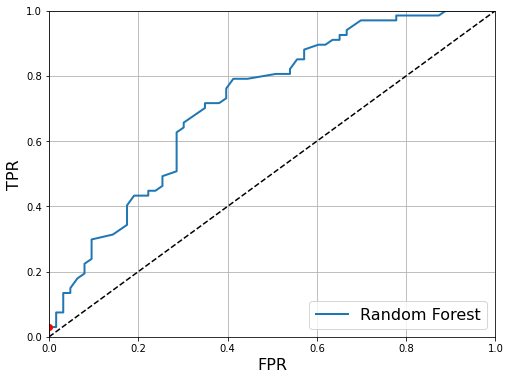

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

plt.figure(figsize=(8, 6))

y_probas_forest = cross_val_predict(rf_clf, X_train, y_train, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)
rf_precisions, rf_recalls, thresholds = precision_recall_curve(y_train, y_scores_forest)

rf_recall_90_precision = rf_recalls[np.argmax(rf_precisions >= 0.90)]

def plot_rf():
    plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
    fpr_90 = fpr_forest[np.argmax(tpr_forest >= rf_recall_90_precision)]           
    plt.plot([fpr_90, fpr_90], [0., rf_recall_90_precision], "r:")
    plt.plot([0.0, fpr_90], [rf_recall_90_precision, rf_recall_90_precision], "r:")
    plt.plot([fpr_90], [rf_recall_90_precision], "ro")
    plt.legend(loc="lower right", fontsize=16)

plot_rf()

plt.show()